In [2]:
import pandas as pd
df = pd.read_csv('C:\\Users\\venka\\Downloads\\New folder\\MFGEmployees4.csv')

df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


In [3]:
#Handling Missing Values
df.isnull().sum()

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [5]:
df.nunique()

EmployeeNumber    8336
Surname           4051
GivenName         1625
Gender               2
City               243
JobTitle            47
DepartmentName      21
StoreLocation       40
Division             6
Age               8298
LengthService     8301
AbsentHours       7016
BusinessUnit         2
dtype: int64

In [6]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [7]:
# Getting an idea about the proportion of values in Absent Hours column
df['AbsentHours'].value_counts()

0.000000      1320
68.600730        2
36.577306        1
40.753756        1
122.200069       1
              ... 
37.356189        1
141.331262       1
46.653227        1
46.007482        1
112.023389       1
Name: AbsentHours, Length: 7016, dtype: int64

array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'LengthService'}>,
        <Axes: title={'center': 'AbsentHours'}>]], dtype=object)

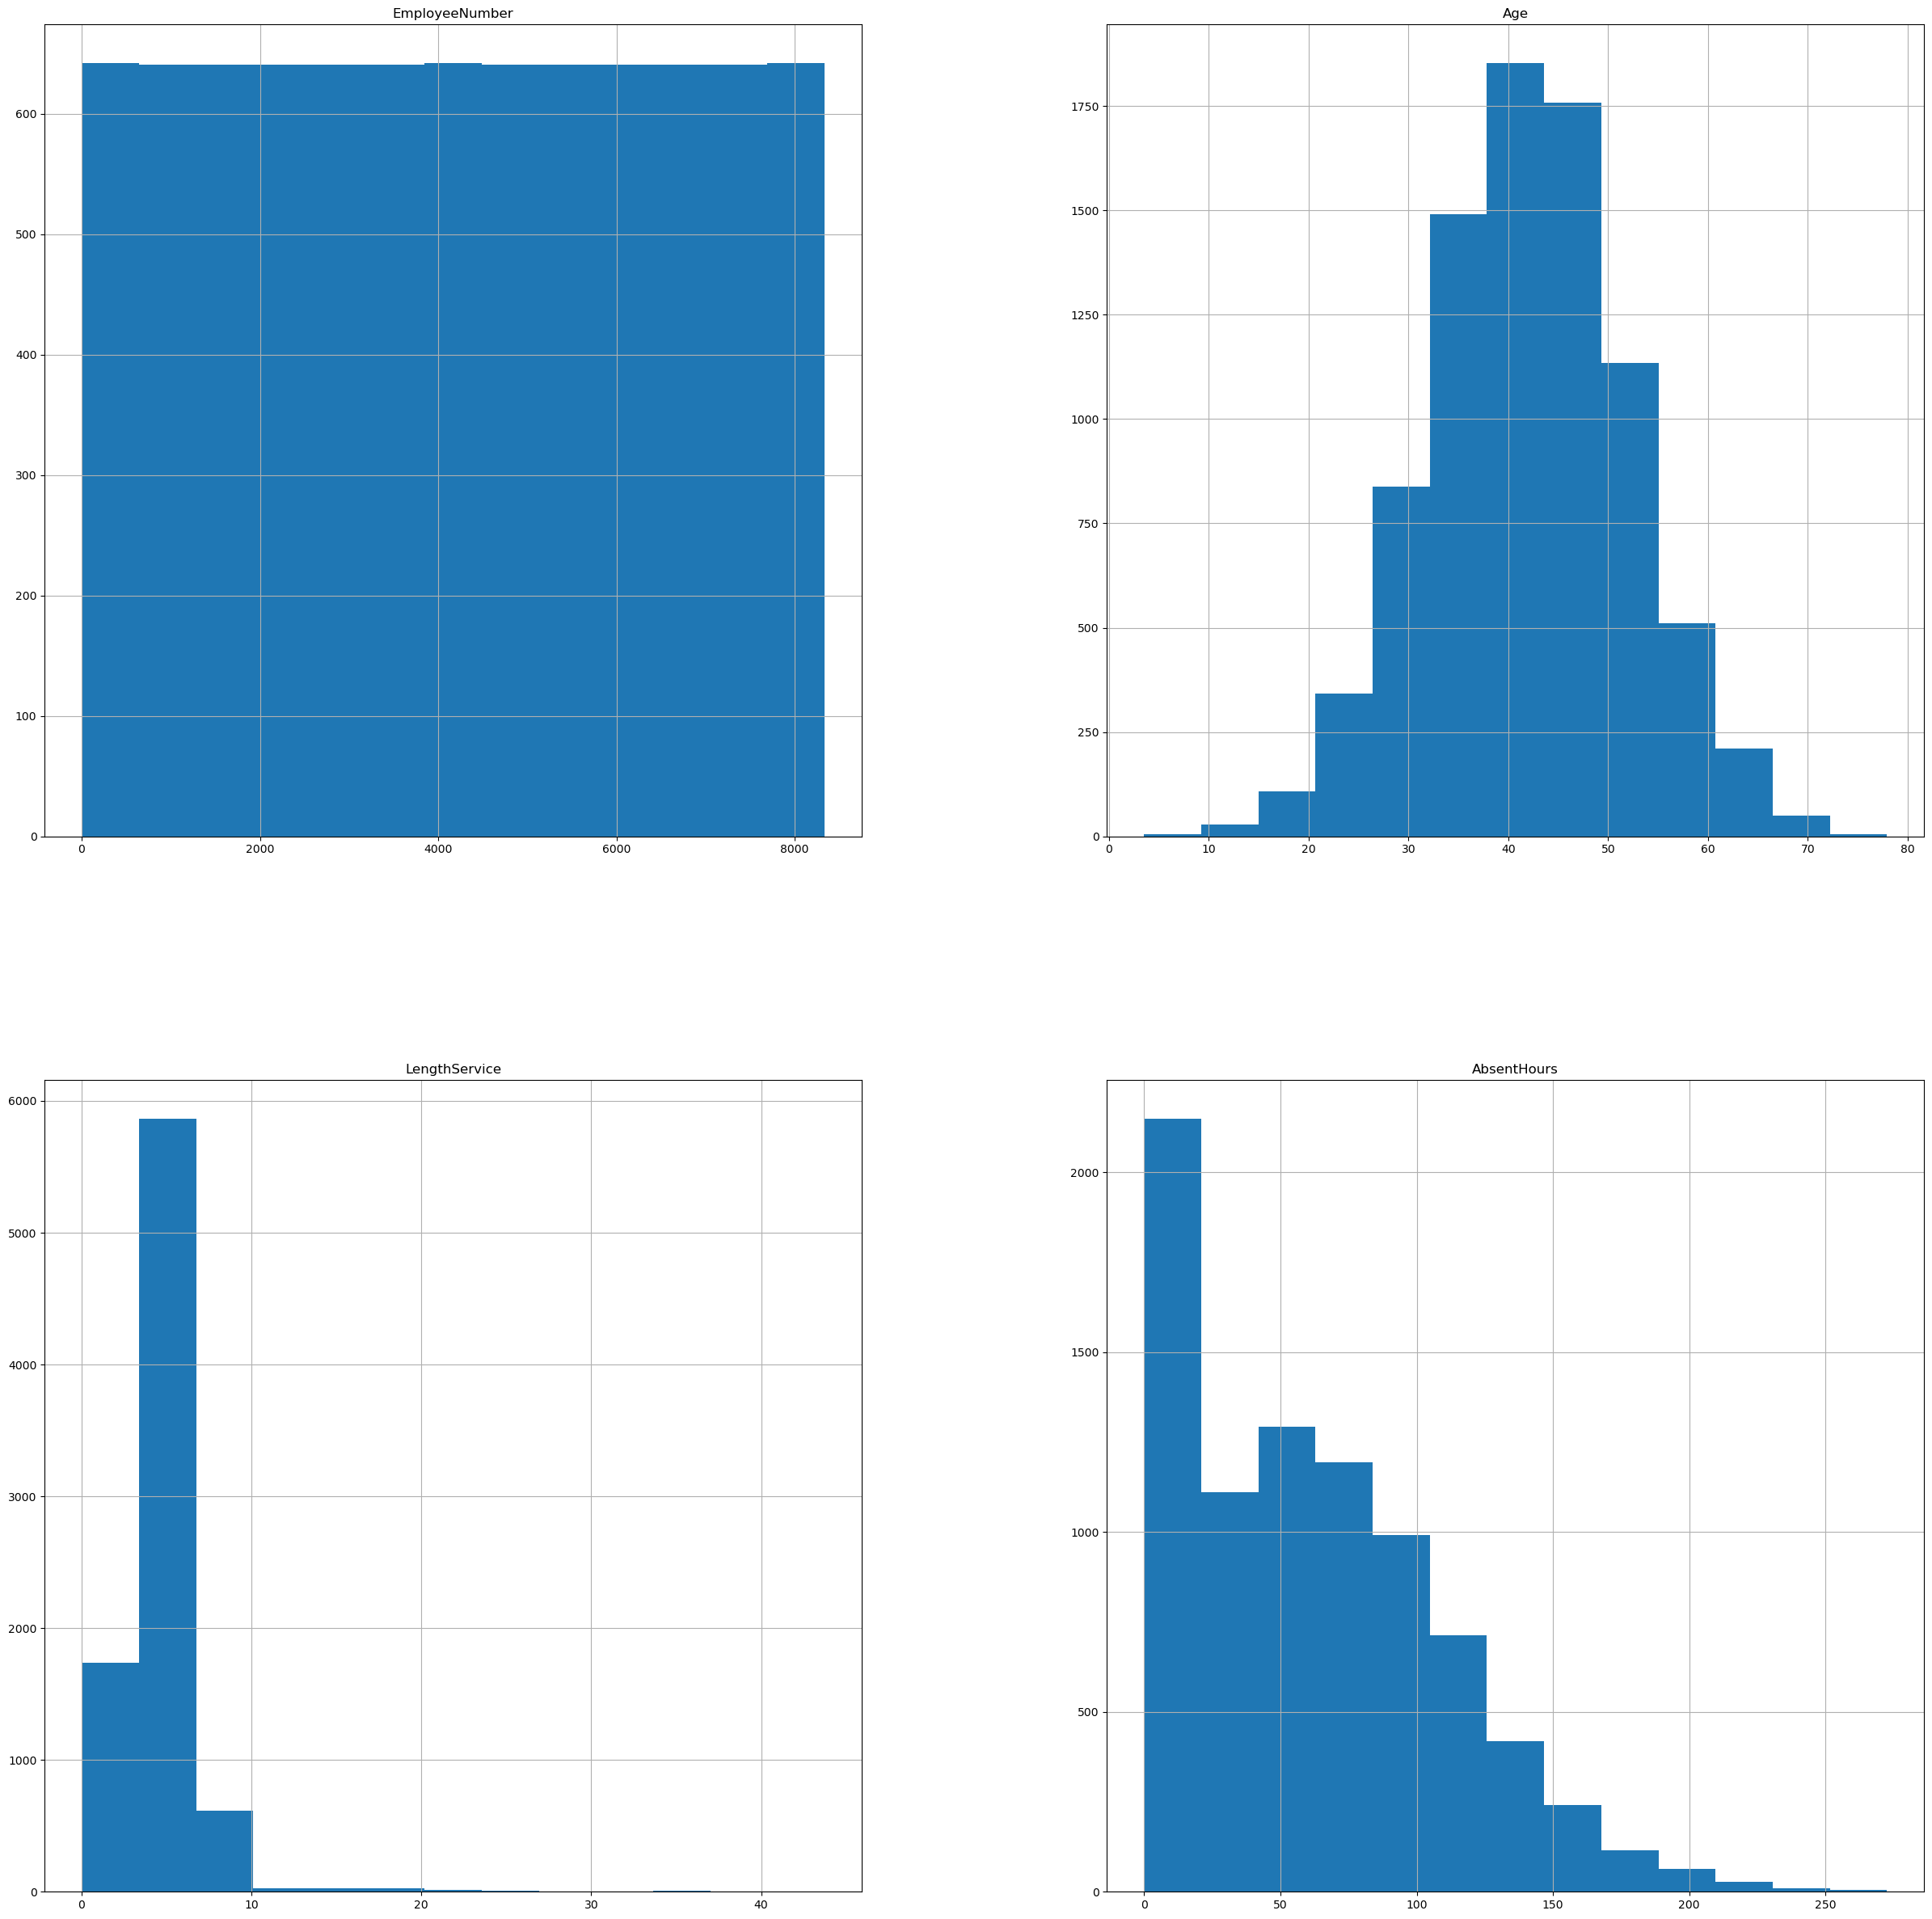

In [8]:
df.hist(bins=13, figsize=(30, 30))

In [9]:
df['LengthService'].value_counts()

1.000000     17
11.775360     2
39.335691     2
3.937957      2
19.460694     2
             ..
5.517231      1
4.958681      1
2.602658      1
3.336581      1
5.174722      1
Name: LengthService, Length: 8301, dtype: int64

In [10]:
correlations=df.corr()['AbsentHours'].abs().sort_values(ascending=False)
print("Correlation with 'AbsentHours':")
print(correlations)

Correlation with 'AbsentHours':
AbsentHours       1.000000
Age               0.830234
LengthService     0.044202
EmployeeNumber    0.007418
Name: AbsentHours, dtype: float64


C:\Users\venka\AppData\Local\Temp\ipykernel_18400\3697181866.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()['AbsentHours'].abs().sort_values(ascending=False)


In [12]:
# Standard Scaler

## Backup
df_ready = df.copy()


df_ready.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [13]:
df_scaled1=df_ready.drop('City',axis=1)

In [14]:
df_scaled1


,EmployeeNumber,Surname,GivenName,Gender,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


In [15]:
unique_values = df['Division'].unique()

# Print the unique values
print(unique_values)

['Stores' 'FinanceAndAccounting' 'HumanResources' 'InfoTech' 'Executive'
 'Legal']


In [16]:
unique_values = df['BusinessUnit'].unique()
print(unique_values)

['Stores' 'HeadOffice']


In [17]:
unique_values = df['JobTitle'].unique()
print(unique_values)

['Baker' 'Accounting Clerk' 'Accounts Payable Clerk'
 'Accounts Receiveable Clerk' 'Auditor' 'Bakery Manager' 'Benefits Admin'
 'Cashier' 'Compensation Analyst' 'HRIS Analyst' 'Investment Analyst'
 'Labor Relations Analyst' 'Recruiter' 'Dairy Person' 'Systems Analyst'
 'Trainer' 'Meat Cutter' 'CEO' 'VP Stores' 'Legal Counsel'
 'VP Human Resources' 'VP Finance' 'Exec Assistant, VP Stores'
 'Exec Assistant, Human Resources' 'Exec Assistant, Legal Counsel'
 'CHief Information Officer' 'Store Manager' 'Meats Manager'
 'Exec Assistant, Finance' 'Director, Recruitment' 'Director, Training'
 'Director, Labor Relations' 'Director, HR Technology'
 'Director, Employee Records' 'Director, Compensation' 'Corporate Lawyer'
 'Produce Manager' 'Director, Accounts Receivable'
 'Director, Accounts Payable' 'Director, Audit' 'Director, Accounting'
 'Director, Investments' 'Processed Foods Manager'
 'Customer Service Manager' 'Dairy Manager' 'Produce Clerk'
 'Shelf Stocker']


In [18]:
unique_values = df['DepartmentName'].unique()
print(unique_values)

['Bakery' 'Accounting' 'Accounts Payable' 'Accounts Receiveable' 'Audit'
 'Employee Records' 'Customer Service' 'Compensation' 'HR Technology'
 'Investment' 'Labor Relations' 'Recruitment' 'Dairy'
 'Information Technology' 'Training' 'Meats' 'Executive'
 'Store Management' 'Legal' 'Produce' 'Processed Foods']


In [19]:
unique_values = df['Division'].unique()
print(unique_values)

['Stores' 'FinanceAndAccounting' 'HumanResources' 'InfoTech' 'Executive'
 'Legal']


In [20]:
unique_values = df['StoreLocation'].unique()
print(unique_values)

['Burnaby' 'Nanaimo' 'Richmond' 'Victoria' 'New Westminster' 'Vancouver'
 'West Vancouver' 'Kamloops' 'North Vancouver' 'Aldergrove' 'Kelowna'
 'Trail' 'Quesnel' 'Cranbrook' 'Abbotsford' 'Dawson Creek' 'Surrey'
 'Squamish' 'Terrace' 'Chilliwack' 'Prince George' 'New Westminister'
 'Vernon' 'Nelson' 'Fort St John' 'Williams Lake' 'Ocean Falls'
 'Port Coquitlam' 'White Rock' 'Langley' 'Haney' 'Princeton' 'Fort Nelson'
 'Valemount' 'Pitt Meadows' 'Bella Bella' 'Cortes Island' 'Grand Forks'
 'Dease Lake' 'Blue River']


In [21]:
# Dealing with Categorical Columns

## List of categorical columns
cat_cols = ['Gender', 'BusinessUnit']
## Encoding
df_scaled1 = pd.get_dummies(data = df_scaled1, columns = cat_cols)




In [22]:
df_scaled1


,EmployeeNumber,Surname,GivenName,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores
0,1,Gutierrez,Molly,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,1,0,0,1
1,2,Hardwick,Stephen,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,0,1,0,1
2,3,Delgado,Chester,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,0,1,0,1
3,4,Simon,Irene,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,1,0,0,1
4,5,Delvalle,Edward,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,1,0,0,1
8332,8333,Cox,Jimmie,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,0,1,0,1
8333,8334,Hawkins,Mary,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,1,0,0,1
8334,8335,Proctor,Theresa,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,1,0,0,1


In [23]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

encoded_values = le.fit_transform(df['JobTitle'])
df_scaled1['Encoded_Column'] = encoded_values

df_scaled1.drop('JobTitle',axis=1)

,EmployeeNumber,Surname,GivenName,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,Encoded_Column
0,1,Gutierrez,Molly,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,1,0,0,1,4
1,2,Hardwick,Stephen,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,0,1,0,1,4
2,3,Delgado,Chester,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,0,1,0,1,4
3,4,Simon,Irene,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,1,0,0,1,4
4,5,Delvalle,Edward,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,1,0,0,1,9
8332,8333,Cox,Jimmie,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,0,1,0,1,9
8333,8334,Hawkins,Mary,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,1,0,0,1,9
8334,8335,Proctor,Theresa,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,1,0,0,1,14


In [24]:
df_scaled1['JobTitleEncoded']=df_scaled1['Encoded_Column']

In [25]:
r=df_scaled1.drop('JobTitle',axis=1)


In [26]:
result_df=r.drop('Encoded_Column',axis=1)
result_df

,EmployeeNumber,Surname,GivenName,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,JobTitleEncoded
0,1,Gutierrez,Molly,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,1,0,0,1,4
1,2,Hardwick,Stephen,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,0,1,0,1,4
2,3,Delgado,Chester,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,0,1,0,1,4
3,4,Simon,Irene,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,1,0,0,1,4
4,5,Delvalle,Edward,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,1,0,0,1,9
8332,8333,Cox,Jimmie,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,0,1,0,1,9
8333,8334,Hawkins,Mary,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,1,0,0,1,9
8334,8335,Proctor,Theresa,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,1,0,0,1,14


In [27]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

encoded_values = le.fit_transform(df['DepartmentName'])
result_df['DepartmentNameEncoded'] = encoded_values



In [28]:
result_df

,EmployeeNumber,Surname,GivenName,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,JobTitleEncoded,DepartmentNameEncoded
0,1,Gutierrez,Molly,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,1,0,0,1,4,4
1,2,Hardwick,Stephen,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,0,1,0,1,4,4
2,3,Delgado,Chester,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,0,1,0,1,4,4
3,4,Simon,Irene,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,1,0,0,1,4,4
4,5,Delvalle,Edward,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,0,1,0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,1,0,0,1,9,6
8332,8333,Cox,Jimmie,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,0,1,0,1,9,6
8333,8334,Hawkins,Mary,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,1,0,0,1,9,6
8334,8335,Proctor,Theresa,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,1,0,0,1,14,7


In [29]:
result1_df=result_df.drop('DepartmentName',axis=1)

In [30]:
result1_df


,EmployeeNumber,Surname,GivenName,StoreLocation,Division,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,JobTitleEncoded,DepartmentNameEncoded
0,1,Gutierrez,Molly,Burnaby,Stores,32.028816,6.018478,36.577306,1,0,0,1,4,4
1,2,Hardwick,Stephen,Nanaimo,Stores,40.320902,5.532445,30.165072,0,1,0,1,4,4
2,3,Delgado,Chester,Richmond,Stores,48.822047,4.389973,83.807798,0,1,0,1,4,4
3,4,Simon,Irene,Victoria,Stores,44.599357,3.081736,70.020165,1,0,0,1,4,4
4,5,Delvalle,Edward,New Westminster,Stores,35.697876,3.619091,0.000000,0,1,0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,Langley,Stores,46.057544,4.838288,93.665111,1,0,0,1,9,6
8332,8333,Cox,Jimmie,Fort St John,Stores,34.455490,2.427274,0.000000,0,1,0,1,9,6
8333,8334,Hawkins,Mary,West Vancouver,Stores,58.347160,4.009393,176.356940,1,0,0,1,9,6
8334,8335,Proctor,Theresa,Vancouver,Stores,43.340616,6.154837,60.321917,1,0,0,1,14,7


In [31]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

encoded_values = le.fit_transform(df['DepartmentName'])
result1_df['StoreLocation'] = encoded_values



In [30]:
result1_df

,EmployeeNumber,Surname,GivenName,StoreLocation,Division,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,JobTitleEncoded,DepartmentNameEncoded
0,1,Gutierrez,Molly,4,Stores,32.028816,6.018478,36.577306,1,0,0,1,4,4
1,2,Hardwick,Stephen,4,Stores,40.320902,5.532445,30.165072,0,1,0,1,4,4
2,3,Delgado,Chester,4,Stores,48.822047,4.389973,83.807798,0,1,0,1,4,4
3,4,Simon,Irene,4,Stores,44.599357,3.081736,70.020165,1,0,0,1,4,4
4,5,Delvalle,Edward,4,Stores,35.697876,3.619091,0.000000,0,1,0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,6,Stores,46.057544,4.838288,93.665111,1,0,0,1,9,6
8332,8333,Cox,Jimmie,6,Stores,34.455490,2.427274,0.000000,0,1,0,1,9,6
8333,8334,Hawkins,Mary,6,Stores,58.347160,4.009393,176.356940,1,0,0,1,9,6
8334,8335,Proctor,Theresa,7,Stores,43.340616,6.154837,60.321917,1,0,0,1,14,7


In [32]:
## List of categorical columns
cat_cols = ['Division']
## one hot Encoding
final_df= pd.get_dummies(data = result1_df, columns = cat_cols)


In [32]:
final_df

,EmployeeNumber,Surname,GivenName,StoreLocation,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,JobTitleEncoded,DepartmentNameEncoded,Division_Executive,Division_FinanceAndAccounting,Division_HumanResources,Division_InfoTech,Division_Legal,Division_Stores
0,1,Gutierrez,Molly,4,32.028816,6.018478,36.577306,1,0,0,1,4,4,0,0,0,0,0,1
1,2,Hardwick,Stephen,4,40.320902,5.532445,30.165072,0,1,0,1,4,4,0,0,0,0,0,1
2,3,Delgado,Chester,4,48.822047,4.389973,83.807798,0,1,0,1,4,4,0,0,0,0,0,1
3,4,Simon,Irene,4,44.599357,3.081736,70.020165,1,0,0,1,4,4,0,0,0,0,0,1
4,5,Delvalle,Edward,4,35.697876,3.619091,0.000000,0,1,0,1,4,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,6,46.057544,4.838288,93.665111,1,0,0,1,9,6,0,0,0,0,0,1
8332,8333,Cox,Jimmie,6,34.455490,2.427274,0.000000,0,1,0,1,9,6,0,0,0,0,0,1
8333,8334,Hawkins,Mary,6,58.347160,4.009393,176.356940,1,0,0,1,9,6,0,0,0,0,0,1
8334,8335,Proctor,Theresa,7,43.340616,6.154837,60.321917,1,0,0,1,14,7,0,0,0,0,0,1


In [33]:
correlation_matrix=final_df.corr().abs()
print(correlation_matrix)


                               EmployeeNumber  StoreLocation       Age  \
EmployeeNumber                       1.000000       0.018016  0.018445   
StoreLocation                        0.018016       1.000000  0.015303   
Age                                  0.018445       0.015303  1.000000   
LengthService                        0.119631       0.009154  0.053104   
AbsentHours                          0.007418       0.012799  0.830234   
Gender_F                             0.001940       0.003080  0.070195   
Gender_M                             0.001940       0.003080  0.070195   
BusinessUnit_HeadOffice              0.202427       0.047062  0.059913   
BusinessUnit_Stores                  0.202427       0.047062  0.059913   
JobTitleEncoded                      0.030206       0.989518  0.012844   
DepartmentNameEncoded                0.018016       1.000000  0.015303   
Division_Executive                   0.042965       0.007031  0.002958   
Division_FinanceAndAccounting        0

C:\Users\venka\AppData\Local\Temp\ipykernel_18400\2136931356.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=final_df.corr().abs()


In [34]:
correlation1 =final_df.corr()['AbsentHours'].abs().sort_values(ascending=False)
print("Correlation with 'AbsentHours':")
print(correlation1)

Correlation with 'AbsentHours':
AbsentHours                      1.000000
Age                              0.830234
Gender_F                         0.108952
Gender_M                         0.108952
LengthService                    0.044202
BusinessUnit_HeadOffice          0.042229
BusinessUnit_Stores              0.042229
Division_Stores                  0.042229
Division_FinanceAndAccounting    0.040845
Division_InfoTech                0.015000
Division_HumanResources          0.013407
JobTitleEncoded                  0.012799
StoreLocation                    0.012799
DepartmentNameEncoded            0.012799
Division_Executive               0.009602
EmployeeNumber                   0.007418
Division_Legal                   0.003820
Name: AbsentHours, dtype: float64


C:\Users\venka\AppData\Local\Temp\ipykernel_18400\4062615777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1 =final_df.corr()['AbsentHours'].abs().sort_values(ascending=False)


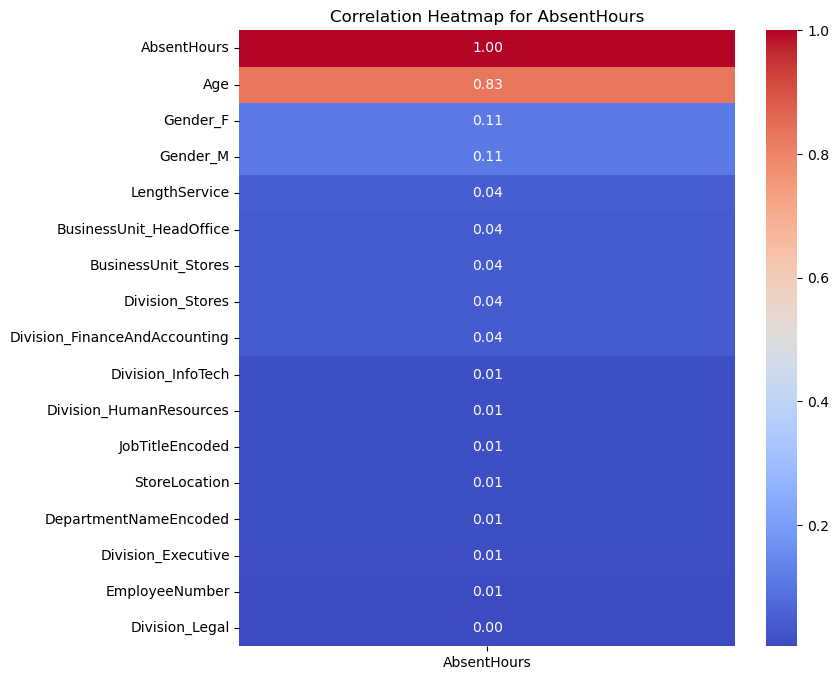

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation1' contains the correlation values you've mentioned

# Creating a heatmap
plt.figure(figsize=(8, 8))  # Set the figure size
sns.heatmap(correlation1.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for AbsentHours')
plt.show()

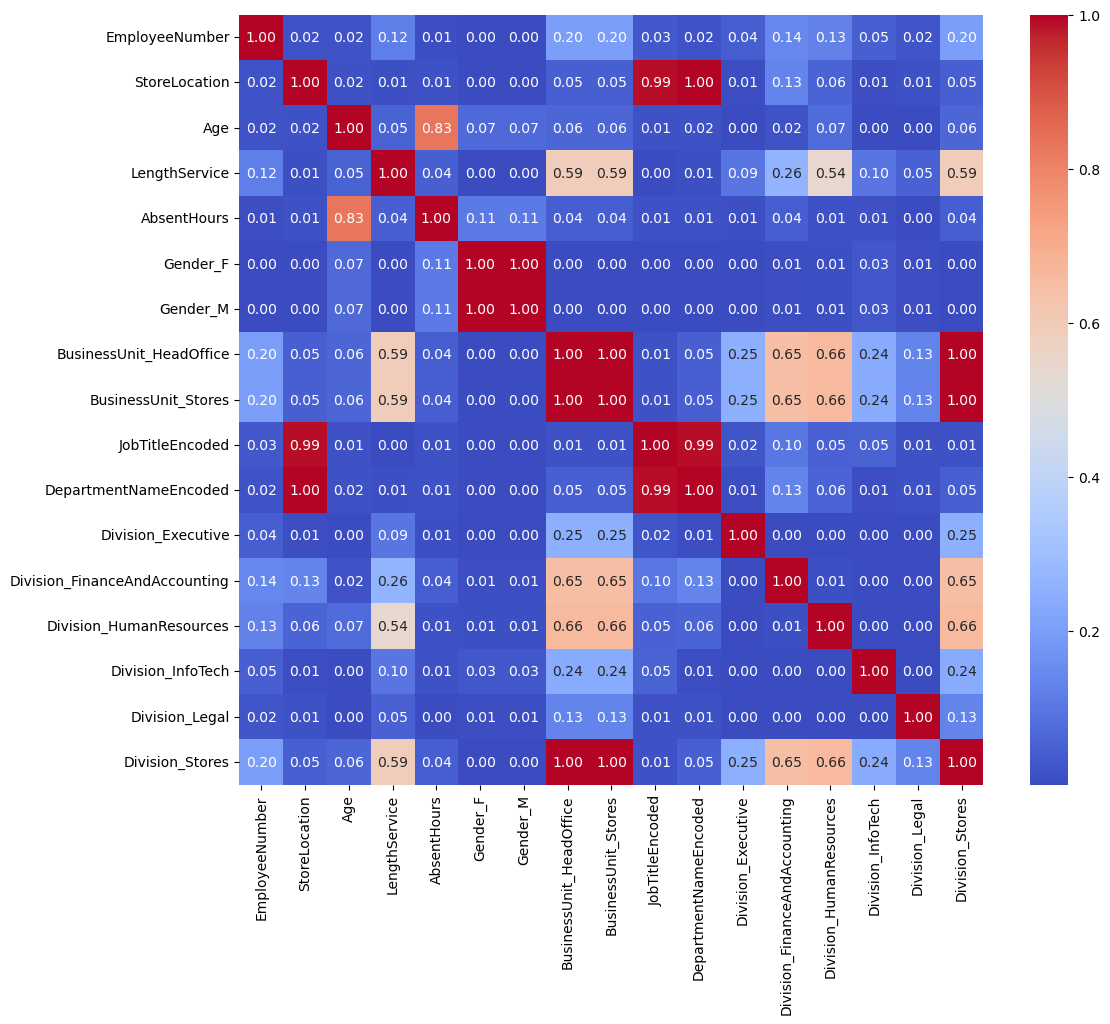

Columns with high correlation (> 0.7): ['AbsentHours', 'Gender_M', 'BusinessUnit_Stores', 'JobTitleEncoded', 'DepartmentNameEncoded', 'Division_Stores']


In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Set the threshold for high correlation
threshold = 0.7  # You can adjust this threshold

# Find columns with correlation above threshold
high_correlation_cols1 = [column for column in upper.columns if any(upper[column] > threshold)]

# Visualize the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

print("Columns with high correlation (> 0.7):", high_correlation_cols1)

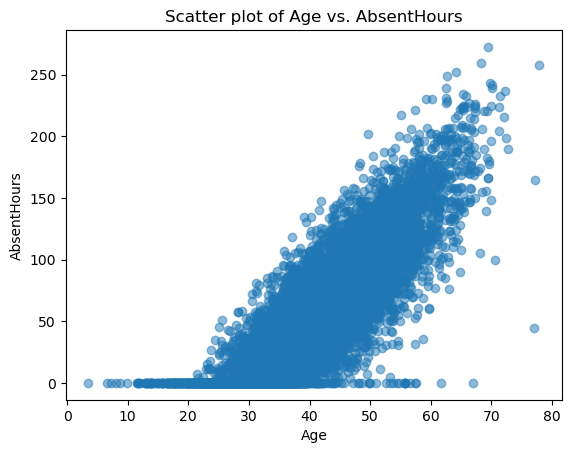

In [37]:
plt.scatter(df['Age'], df['AbsentHours'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('AbsentHours')
plt.title('Scatter plot of Age vs. AbsentHours')
plt.show()

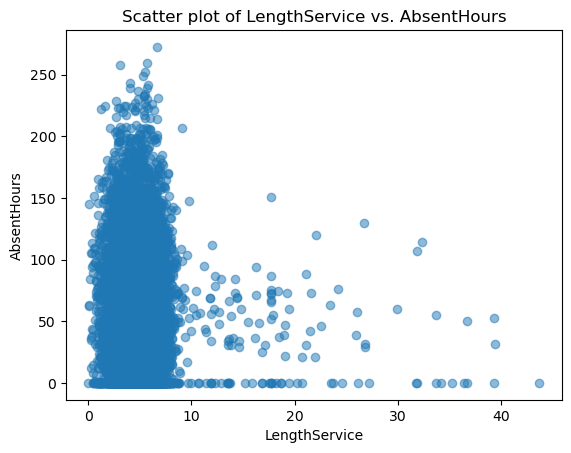

In [38]:
plt.scatter(df['LengthService'], df['AbsentHours'], alpha=0.5)
plt.xlabel('LengthService')
plt.ylabel('AbsentHours')
plt.title('Scatter plot of LengthService vs. AbsentHours')
plt.show()

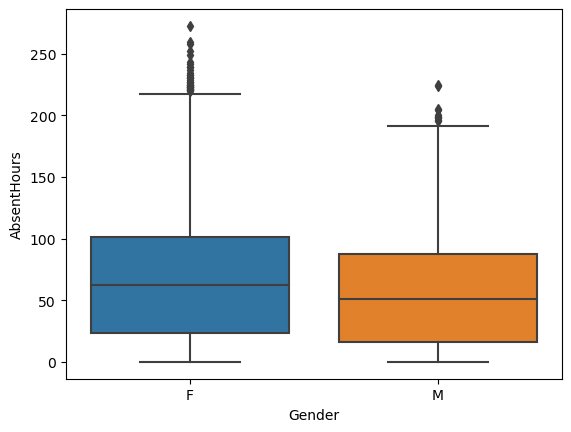

In [39]:
sns.boxplot(x='Gender', y='AbsentHours', data=df)
plt.show()

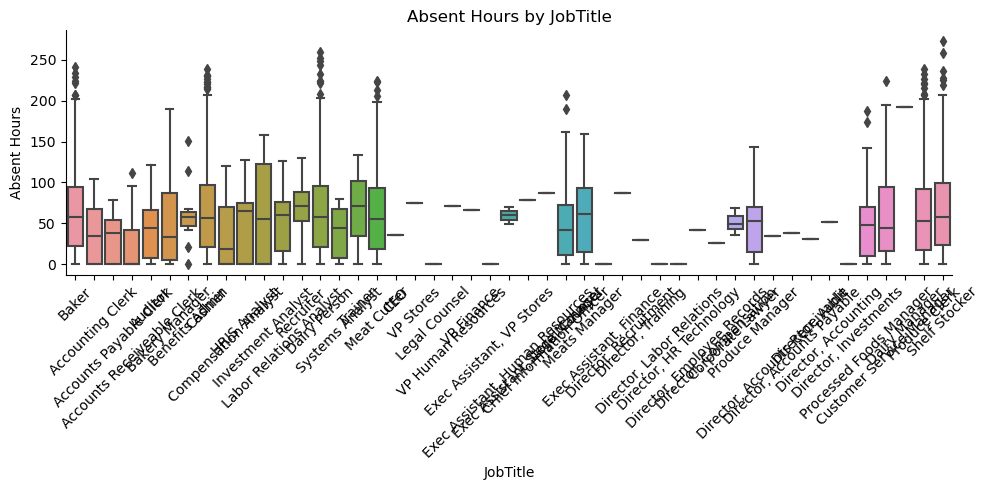

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'AbsentHours' based on 'JobTitle'
sns.catplot(x='JobTitle', y='AbsentHours', kind='box', data=df, aspect=2)
plt.xlabel('JobTitle')
plt.ylabel('Absent Hours')
plt.title('Absent Hours by JobTitle')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

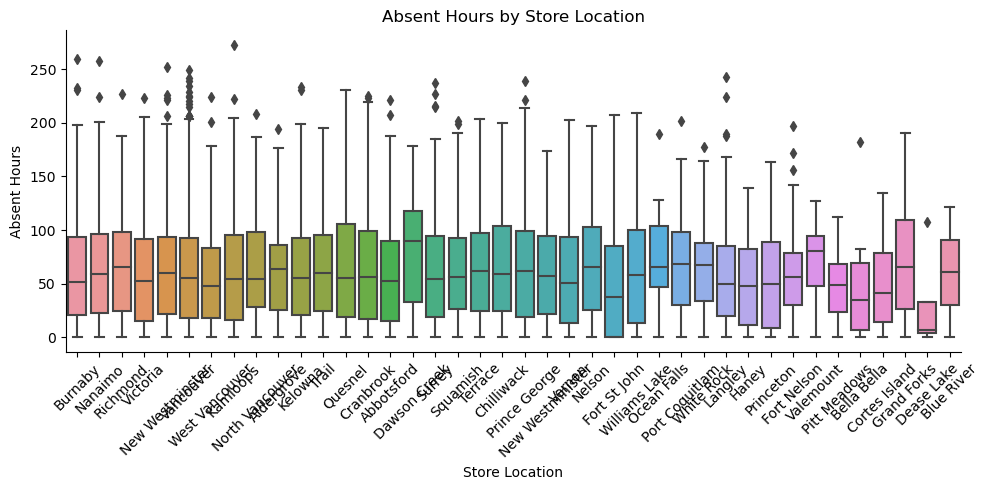

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'AbsentHours' based on 'StoreLocation'
sns.catplot(x='StoreLocation', y='AbsentHours', kind='box', data=df, aspect=2)
plt.xlabel('Store Location')
plt.ylabel('Absent Hours')
plt.title('Absent Hours by Store Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

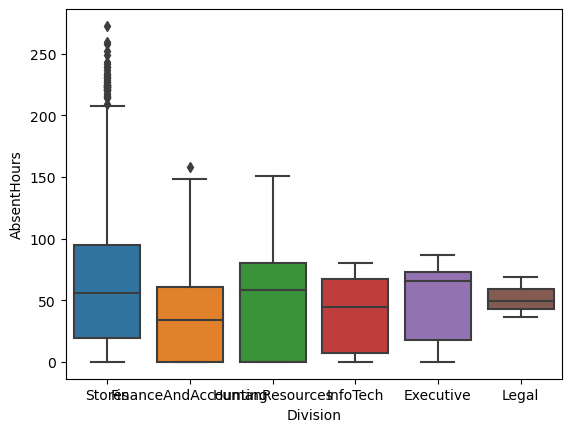

In [42]:
sns.boxplot(x='Division', y='AbsentHours', data=df)
plt.show()

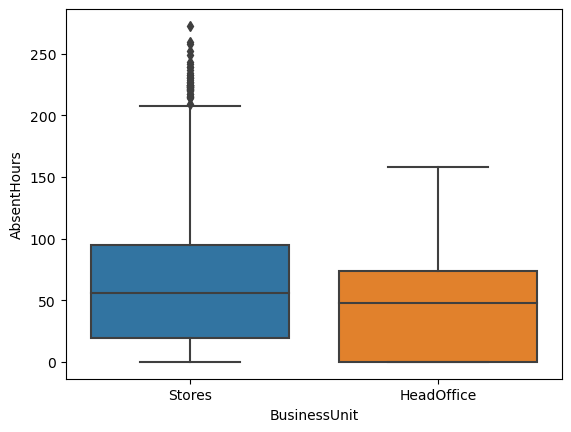

In [43]:
sns.boxplot(x='BusinessUnit', y='AbsentHours', data=df)
plt.show()

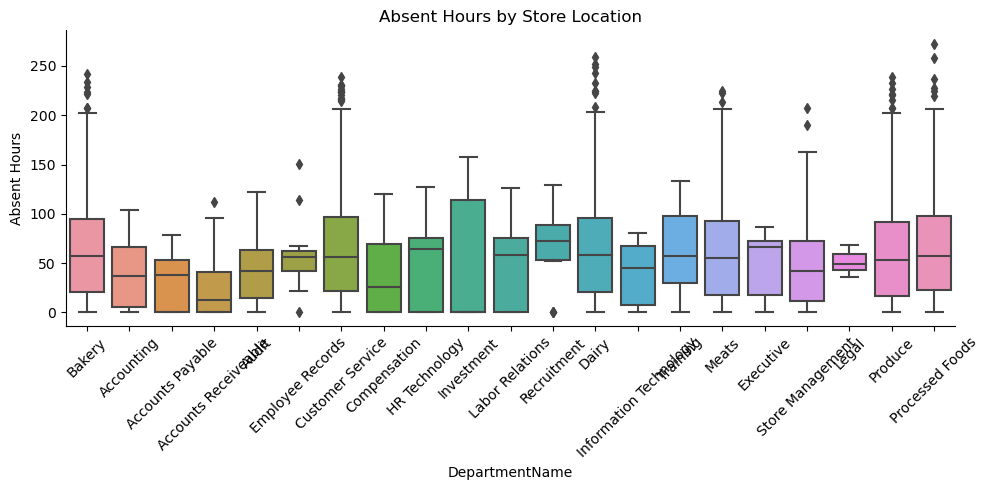

In [44]:
#create a boxplot for 'AbsentHours' based on 'DepartmentName'
sns.catplot(x='DepartmentName', y='AbsentHours', kind='box', data=df, aspect=2)
plt.xlabel('DepartmentName')
plt.ylabel('Absent Hours')
plt.title('Absent Hours by Store Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [45]:

final1_df=final_df.drop('GivenName',axis=1)

In [46]:

final2_df=final1_df.drop('Surname',axis=1)

In [47]:
final2_df

,EmployeeNumber,StoreLocation,Age,LengthService,AbsentHours,Gender_F,Gender_M,BusinessUnit_HeadOffice,BusinessUnit_Stores,JobTitleEncoded,DepartmentNameEncoded,Division_Executive,Division_FinanceAndAccounting,Division_HumanResources,Division_InfoTech,Division_Legal,Division_Stores
0,1,4,32.028816,6.018478,36.577306,1,0,0,1,4,4,0,0,0,0,0,1
1,2,4,40.320902,5.532445,30.165072,0,1,0,1,4,4,0,0,0,0,0,1
2,3,4,48.822047,4.389973,83.807798,0,1,0,1,4,4,0,0,0,0,0,1
3,4,4,44.599357,3.081736,70.020165,1,0,0,1,4,4,0,0,0,0,0,1
4,5,4,35.697876,3.619091,0.000000,0,1,0,1,4,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,6,46.057544,4.838288,93.665111,1,0,0,1,9,6,0,0,0,0,0,1
8332,8333,6,34.455490,2.427274,0.000000,0,1,0,1,9,6,0,0,0,0,0,1
8333,8334,6,58.347160,4.009393,176.356940,1,0,0,1,9,6,0,0,0,0,0,1
8334,8335,7,43.340616,6.154837,60.321917,1,0,0,1,14,7,0,0,0,0,0,1


In [147]:
#Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = final2_df.drop(columns=['AbsentHours'])  # Features
y = final2_df['AbsentHours']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLR model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predict on test set
y_pred_mlr = mlr.predict(X_test)

# Calculate metrics
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

In [148]:
print(mse_mlr,rmse_mlr,r2_mlr)

675.8427527850749 25.996975839221665 0.702225519180218


In [149]:
#RandomForestRegressor Model

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RFR model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rfr.fit(X_train, y_train)

# Predict on test set
y_pred_rfr = rfr.predict(X_test)

# Calculate metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

In [150]:
print(mse_rfr,rmse_rfr,r2_rfr)

657.8174158683769 25.647951494580944 0.7101674336564072


In [ ]:
#Linear Regression model with PCA

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Apply PCA
pca = PCA(n_components=7)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# MLR with PCA
mlr_pca = LinearRegression()
mlr_pca.fit(X_train_pca, y_train)

# Predict on test set
y_pred_mlr_pca = mlr_pca.predict(X_test_pca)

# Calculate metrics
mse_mlr_pca = mean_squared_error(y_test, y_pred_mlr_pca)
rmse_mlr_pca = np.sqrt(mse_mlr_pca)
r2_mlr_pca = r2_score(y_test, y_pred_mlr_pca)



In [151]:
print(mse_mlr_pca,rmse_mlr_pca,r2_mlr_pca)

673.0690071102016 25.94357352236198 0.7034476239891515


In [152]:
#RandomForestRegressor Model WITH PCA

rfr_pca = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rfr_pca.fit(X_train_pca, y_train)

# Predict on test set
y_pred_rfr_pca = rfr_pca.predict(X_test_pca)

# Calculate metrics
mse_rfr_pca = mean_squared_error(y_test, y_pred_rfr_pca)
rmse_rfr_pca = np.sqrt(mse_rfr_pca)
r2_rfr_pca = r2_score(y_test, y_pred_rfr_pca)

In [153]:
print(mse_rfr_pca,rmse_rfr_pca,r2_rfr_pca)

666.8069756283787 25.822605903130277 0.7062066580480251


In [ ]:
##INFERENCES

Comparing the Random Forest Regression (RFR) model results with and without PCA:

Without PCA:

MSE: 657.8174158683769
RMSE: 25.647951494580944
R-squared (R2): 0.7101674336564072
With PCA:

MSE: 666.8069756283787
RMSE: 25.822605903130277
R-squared (R2): 0.7062066580480251
    
Both models, with and without PCA, seem to perform fairly similarly. 
The model without PCA has slightly better metrics with a slightly lower MSE and higher R2 score, indicating better predictive performance and a better fit to the data.

However, the difference in performance between the two approaches is marginal. 
 The model without PCA slightly outperformed the model with PCA based on the provided metrics.




In [132]:
##Hyper parameter tuning with n_estimators=80 and max tree depth=10

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RFR model


rfr1 = RandomForestRegressor(n_estimators=80,max_depth=10,random_state=42)
rfr1.fit(X_train, y_train)

# Predict on test set
y_pred_rfr1 = rfr1.predict(X_test)

# Calculate metrics
mse_rfr1 = mean_squared_error(y_test, y_pred_rfr1)
rmse_rfr1 = np.sqrt(mse_rfr1)
r2_rfr1 = r2_score(y_test, y_pred_rfr1)

In [133]:
print(mse_rfr1,rmse_rfr1,r2_rfr1)

626.0403568099821 25.020798484660357 0.7241683195490198


In [157]:
##Hyper parameter tuning with n_estimators=80 and max tree depth=10 for rfr pca model


rfr_pca1 = RandomForestRegressor(n_estimators=80,max_depth=10, random_state=42)  # You can adjust hyperparameters
rfr_pca1.fit(X_train_pca, y_train)

# Predict on test set
y_pred_rfr_pca1 = rfr_pca1.predict(X_test_pca)

# Calculate metrics
mse_rfr_pca1 = mean_squared_error(y_test, y_pred_rfr_pca1)
rmse_rfr_pca1 = np.sqrt(mse_rfr_pca1)
r2_rfr_pca1 = r2_score(y_test, y_pred_rfr_pca1)

In [158]:
print(mse_rfr_pca1,rmse_rfr_pca1,r2_rfr_pca1)

650.3856340727928 25.50265935295362 0.7134418565256715


In [ ]:
#Inferences

On performing hyperparameter tuning on a Random Forest Regressor (RFR) model the tested two configurations:

Original RFR Model:

Mean Squared Error (MSE): 626.04
Root Mean Squared Error (RMSE): 25.02
R-squared (R2): 0.724
RFR Model with PCA:

Mean Squared Error (MSE): 650.39
Root Mean Squared Error (RMSE): 25.50
R-squared (R2): 0.713
After tuning the hyperparameters n_estimators=80 and max_depth=10, the original Random Forest Regressor model seems to perform better than the model with PCA in terms of MSE, RMSE, and R2 score.

The result indicates that the original model without PCA performed slightly better after hyperparameter tuning.





